# PROBLEMA

Empresas de alimentos ocupam, um dos principais setores de uma econômia, como outras empresas requer planejamento, estudo de mercado e garantir a disponibilidade de seu produto. A tarefa de prever o volume de vendas, não é algo fácil de ser realizado. Dessa forma uma empresa que possa mensurar o real impacto de suas ações estratégicas terá vantagens competitivas perante suas concorrentes. 
A XYZ possui dificuldades para realizar previsões de vendas de seu produto.

# SOLUÇÃO

Realizar uma análise das informações da base de dados e com ajuda das redes neurais artificiais prever um possível aumento da demanda para evitar uma produção incompativel com a demanda.

In [1]:
import io
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import tensorflow as tf

# DATASET

In [2]:
dataset = files.upload()

Saving SalesData.csv to SalesData.csv


In [3]:
dataset = pd.read_csv(io.BytesIO(dataset['SalesData.csv']))

# ESTRUTURA DOS DADOS

In [4]:
print("Informações dos primeiros índices")
dataset.head()

Informações dos primeiros índices


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
print("Dados estatísticos")
dataset.describe()

Dados estatísticos


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
print("Informações dos tipos de dados")
dataset.info()

Informações dos tipos de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
print("Verificação de valores nulos")
dataset.isnull().sum()

Verificação de valores nulos


Temperature    0
Revenue        0
dtype: int64

In [8]:
print("Verificação de valores ausentes")
dataset.isna().sum()

Verificação de valores ausentes


Temperature    0
Revenue        0
dtype: int64

In [9]:
dataset = dataset.rename(columns={'Temperature':'temperatura', 'Revenue':'rendimento'})

**Esse sistema indica uma forte relação linear entre as 2 variáveis**

In [10]:
dataset.corr()

,temperatura,rendimento
temperatura,1.000000,0.989802
rendimento,0.989802,1.000000


In [11]:
sns.set_theme(color_codes=True)
tips = sns.load_dataset('tips')

**Neste gráfico podemos observar que uma variavel possui relação com a outra**

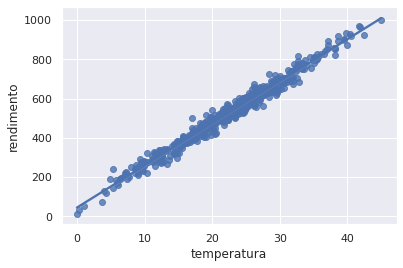

In [12]:
sns.regplot(x='temperatura', y='rendimento', data=dataset)

In [13]:
x, y = dataset[['temperatura']], dataset.rendimento

In [14]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

**Verificação de quão bem o modelo de regressão se ajusta aos dados**

In [15]:
r_square = model.score(x, y)
r_square

0.979707200117581

#PREPARAÇÃO DOS DADOS

In [16]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 0].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [19]:
x_train.shape

(375, 1)

In [20]:
y_train.shape

(375,)

In [21]:
y_test.shape

(125,)

#MODELO

In [27]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(1,)))
modelo.add(tf.keras.layers.Dense(units=100, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=100, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [28]:
modelo.compile(optimizer='Adam', loss='mean_squared_error')

In [29]:
epocas = modelo.fit(x_train, y_train, epochs = 10, batch_size = 50, validation_split=0.02)

Epoch 1/10
8/8 [==============================] - 1s 20ms/step - loss: 519.0429 - val_loss: 214.8522
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 265.9955 - val_loss: 84.5916
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 77.8973 - val_loss: 4.2417
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 5.0987 - val_loss: 11.5745
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 15.8204 - val_loss: 2.3655
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 1.1426 - val_loss: 1.4334
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 2.7102 - val_loss: 0.5176
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3115 - val_loss: 0.3206
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4422 - val_loss: 0.0543
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0726 - val_loss: 0.0393


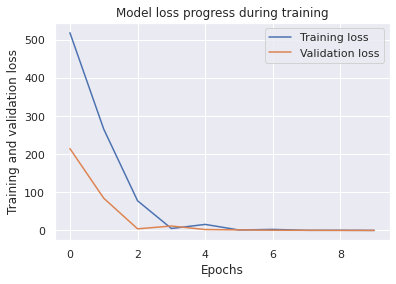

In [30]:
plt.plot(epocas.history['loss'])
plt.plot(epocas.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [31]:
previsores = modelo.predict(x_test)
previsores[:20]

array([[15.1402235],
       [15.02976  ],
       [12.86186  ],
       [18.711002 ],
       [ 6.460212 ],
       [29.820198 ],
       [16.078844 ],
       [13.569502 ],
       [18.311466 ],
       [16.91807  ],
       [23.689243 ],
       [21.25717  ],
       [24.745413 ],
       [ 0.4976479],
       [21.095095 ],
       [36.000576 ],
       [19.582481 ],
       [24.497389 ],
       [32.23407  ],
       [25.594858 ]], dtype=float32)

Text(0, 0.5, 'Valores verdadeiros')

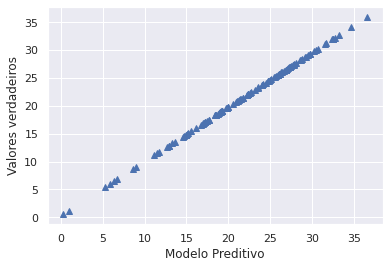

In [32]:
plt.plot(y_test, previsores, "^", color = 'b')
plt.xlabel('Modelo Preditivo')
plt.ylabel('Valores verdadeiros')

**média da soma de todos os erros**

In [33]:
print('MAE: %.2f' % mean_absolute_error(y_test, previsores))

MAE: 0.25


**média da soma de todos os erros elevado ao quadrado**

In [34]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, previsores))

Mean squared error: 0.08


**O coeficiente de Determinação (R²) varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear**

In [35]:
print('R2 Score: %.2f' % r2_score(y_test, previsores))

R2 Score: 1.00
